通向不同局部最小值的 DRL 路径示例
EXAMPLE DRL PATHWAYS TO DIFFERENT LOCAL MINIMA

Max energy timestep: 199
Energies shape: (102,)
Timesteps shape: (102,)
Actions shape: (102,)
Energies: [0.         0.32794973 0.46783027 1.05847028 0.47005388 0.47011192
 0.89706743 0.47288654 0.4700677  0.4717413  0.47238373 0.74430059
 0.879428   0.46993743 1.00012005 0.47015278 0.46996447 0.47023949
 0.47069222 0.47233302 0.47003988 0.93916538 1.12340934 0.9482028
 1.0009349  0.47266154 1.3347722  0.47670723 1.02764187 0.48063394
 1.29161744 0.47011842 0.96880046 0.47452374 0.47054779 1.02709483
 0.47092943 1.30847698 1.34630738 1.72890847 2.03026854 1.87246235
 0.47297738 0.47026001 0.47020661 0.93333613 0.4768907  0.47067723
 1.05548831 1.34027129 1.58291942 1.14633004 0.47062927 0.47000225
 1.53109087 1.54566913 0.47331948 0.46988346 1.57123133 0.47015715
 0.47011914 0.47011914 0.4726109  0.46987    0.47078345 0.84394463
 0.89839537 0.47237758 0.47080577 0.47035961 0.95629514 0.47034606
 1.16188907 0.47013914 1.17410818 0.47340636 1.019614   1.25798775
 1.02474731 1.02238935 1.1

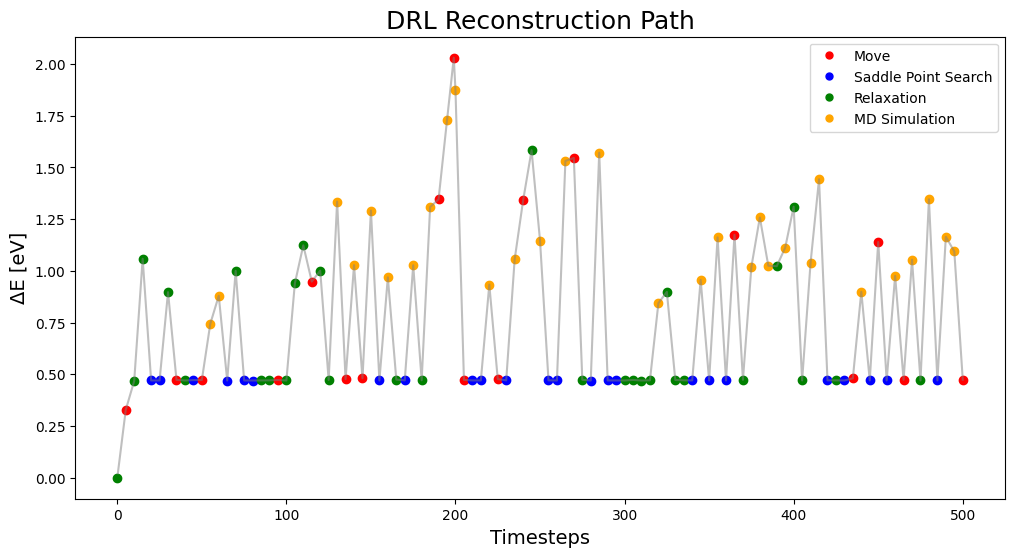

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 指定要读取的 .npz 文件路径
file_path = './result_multi_env/test_surfrecon/history/0_0.000000_5.822787_2.030269.npz'

# 使用 numpy 加载 .npz 文件
data = np.load(file_path)

# 提取需要的信息
energies = data['energies']
actions = data['actions']
timesteps = np.arange(len(energies))  # 生成所有timesteps

# 减少数据点，仅每5步采样一个点
sample_indices = np.arange(0, len(timesteps), 5)   #调步长

# 修改过的地方：确保采样到最后一个点
if sample_indices[-1] != len(timesteps) - 1:  # 检查最后一个索引是否已采样
    sample_indices = np.append(sample_indices, len(timesteps) - 1)  # 添加最后一个点

# 修改过的地方：确保采样到能量最高的点
max_energy_idx = np.argmax(energies)
if max_energy_idx not in sample_indices:  # 添加能量最高点
    sample_indices = np.append(sample_indices, max_energy_idx)
    
# 修改过的地方：对采样后的索引排序
sample_indices = np.sort(sample_indices)
    
# 打印能量最高的点的步数
print("Max energy timestep:", max_energy_idx)

sampled_timesteps = timesteps[sample_indices]
sampled_energies = energies[sample_indices]
sampled_actions = actions[sample_indices]

def plot_reconstruction_path(timesteps, energies, actions):
    # 动作颜色映射
    action_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}  # Move, Saddle Point Search, Relaxation, MD Simulation

    # 动作标签映射
    action_labels = {0: 'Move', 1: 'Saddle Point Search', 2: 'Relaxation', 3: 'MD Simulation'}

    plt.figure(figsize=(12, 6))
    
    # 绘制点
    for step, energy, action in zip(timesteps, energies, actions):
        plt.plot(step, energy, 'o', color=action_colors.get(action, 'black'), label=action_labels.get(action, 'Unknown'))

    # 绘制连接线段
    plt.plot(timesteps, energies, linestyle='-', color='gray', alpha=0.5)

    # 确保初始点被标记
    plt.plot(timesteps[0], energies[0], 'o', color=action_colors.get(actions[0], 'black'), markersize=5)

    plt.xlabel('Timesteps', fontsize=14)
    plt.ylabel('ΔE [eV]', fontsize=14)
    plt.title('DRL Reconstruction Path', fontsize=18)
    
    # 添加自定义图例
    handles, labels = [], []
    for key in action_colors:
        handles.append(plt.Line2D([], [], marker='o', color=action_colors[key], linestyle='None', markersize=5))
        labels.append(action_labels[key])
    plt.legend(handles, labels, loc='best')
    
    plt.show()

# 打印数据形状
print("Energies shape:", sampled_energies.shape if sampled_energies is not None else "None")
print("Timesteps shape:", sampled_timesteps.shape if sampled_timesteps is not None else "None")
print("Actions shape:", sampled_actions.shape if sampled_actions is not None else "None")
print("Energies:", sampled_energies)
print("Actions:", sampled_actions)

# 绘制重构路径折线图
plot_reconstruction_path(sampled_timesteps, sampled_energies, sampled_actions)
